In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import pickle
from tensorflow.keras.callbacks import TensorBoard
%matplotlib inline
import json
import keras

Reading the json file.

In [2]:
with open("data_json_small.json") as d:
    file = json.load(d)

Fetching the utterances and the category from the above json file

In [3]:
data = []
for conversation_dataset in file['conversation_dataset']:
    for conversation in conversation_dataset['conversation']:
        for turns in conversation['turns']:
            data.append([turns['utterance'], turns['category'][0]])


Loading the data on to a dataframe

In [4]:
df = pd.DataFrame(data, columns= ['utterance', 'category'])

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
utterance    1100 non-null object
category     1100 non-null object
dtypes: object(2)
memory usage: 17.3+ KB


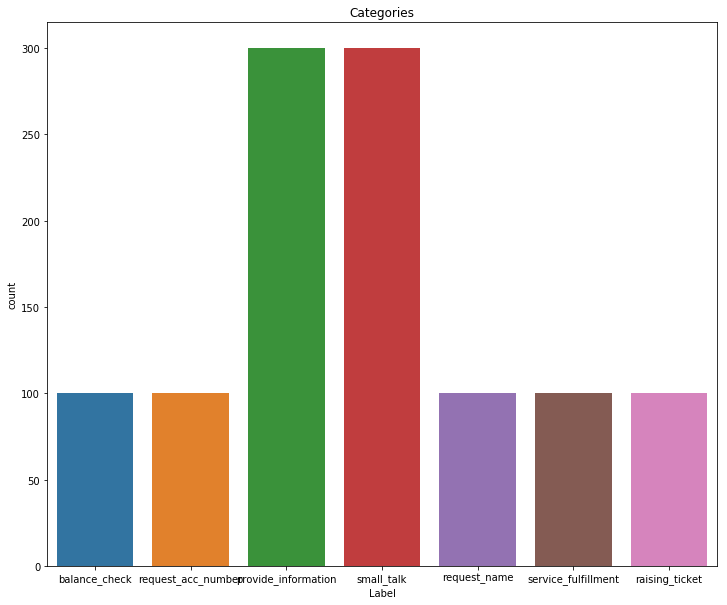

In [6]:
plt.figure(figsize=[12,10])
sns.countplot(df.category)
plt.xlabel('Label')
plt.title('Categories')
plt.show()

Making all the characters into lower case

In [7]:
df['utterance']= df['utterance'].str.lower()

Removing all the account numbers and any other numerical formats.

In [8]:
df['utterance']= df['utterance'].str.replace(r'[0-9]+', '')

Converting the utterances and categories into Tuples

In [9]:
X = df.utterance
Y = df.category


Encoding the Categories into Numerical Labels

In [10]:
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split data into train and test data

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)


In [12]:
X_train.head()

524     thank you for name verification. your balance ...
765                                  this is  gopal singh
203     that's good. please state your name as in the ...
1094    great. could you please let me know your name ...
445     thank you sir, i've to verify your name. could...
Name: utterance, dtype: object

Tokenizing the words using the Keras preprocessing library and converting words into sequences.
The Sequences are then pre-padded so as to make all the inputs to be of same size and shape.

In [13]:
max_words = 1000
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)


In [14]:
sequences = tok.texts_to_sequences(X_train)
sequences

[[35, 2, 7, 15, 31, 3, 9, 55, 70, 61, 4],
 [67, 4, 137, 114],
 [155, 28, 11, 156, 3, 15, 55, 13, 18, 56, 7, 31, 45],
 [74, 22, 2, 11, 135, 20, 33, 3, 15, 7, 31, 45],
 [35, 2, 36, 51, 8, 127, 3, 15, 22, 2, 11, 21, 20, 3, 15, 36],
 [43],
 [44, 150, 120],
 [75, 11, 21, 20, 3, 15, 7, 31, 45],
 [35, 2, 26, 78, 3, 6],
 [138],
 [75, 11, 21, 20, 3, 15, 7, 31, 45],
 [44, 121],
 [44, 122, 157],
 [85,
  32,
  105,
  70,
  16,
  8,
  2,
  51,
  107,
  108,
  71,
  23,
  27,
  24,
  109,
  37,
  6,
  7,
  12,
  4,
  110,
  19,
  62,
  8,
  2,
  63,
  71,
  12,
  4,
  38,
  39,
  40,
  1,
  17,
  50,
  2,
  14],
 [30, 115, 3, 15, 2, 29, 13, 3, 5],
 [111,
  1,
  128,
  49,
  86,
  87,
  61,
  91,
  27,
  1,
  41,
  8,
  33,
  72,
  73,
  54,
  1,
  29,
  13,
  10,
  5,
  89,
  1,
  57,
  19,
  25,
  13,
  23,
  22,
  2,
  11,
  21,
  20,
  10,
  5,
  9],
 [116, 30],
 [43, 10, 6, 4],
 [1,
  17,
  139,
  36,
  32,
  17,
  99,
  68,
  25,
  1,
  58,
  18,
  48,
  96,
  36,
  1,
  26,
  16,
  2,
  14,
  

In [15]:
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix[7]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 75, 11, 21, 20,  3, 15,  7, 31, 45])

Creating a LSTM model with embedded inputs and a single layer of LSTM coupled with a dropout layer of 20% and relu activation function. The output layer is a dense layer with 7 nodes and a softmax activation.

In [21]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(7,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Here is the summary of the model . The loss function is a sparse categorical crossentropy and the optimizer is the adams.

In [24]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 50)           50000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 7)                 1799

In [38]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=50,validation_split=0.2,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')])

Train on 748 samples, validate on 187 samples
Epoch 1/50
748/748 [==============================] - 1s 1ms/step - loss: 1.8887 - accuracy: 0.3770 - val_loss: 1.7980 - val_accuracy: 0.3422
Epoch 2/50
748/748 [==============================] - 1s 1ms/step - loss: 1.6853 - accuracy: 0.3369 - val_loss: 1.5389 - val_accuracy: 0.3743
Epoch 3/50
748/748 [==============================] - 1s 1ms/step - loss: 1.5074 - accuracy: 0.4118 - val_loss: 1.3852 - val_accuracy: 0.4706
Epoch 4/50
748/748 [==============================] - 1s 1ms/step - loss: 1.3331 - accuracy: 0.4906 - val_loss: 1.1966 - val_accuracy: 0.5401
Epoch 5/50
748/748 [==============================] - 1s 1ms/step - loss: 1.1566 - accuracy: 0.5575 - val_loss: 1.0813 - val_accuracy: 0.4011
Epoch 6/50
748/748 [==============================] - 1s 1ms/step - loss: 0.9955 - accuracy: 0.6297 - val_loss: 0.8508 - val_accuracy: 0.6845
Epoch 7/50
748/748 [==============================] - 1s 1ms/step - loss: 0.8031 - accuracy: 0.7206 - 

# Test model 

Test data is converted into sequences and then to a padded input 

In [27]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [39]:
accr = model.evaluate(test_sequences_matrix,Y_test)

165/165 [==============================] - 0s 3ms/step


In [40]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Test set
  Loss: 0.001
  Accuracy: 1.000


In [41]:
model.save("model.h5")

In [44]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tok, handle, protocol=pickle.HIGHEST_PROTOCOL)